<a href="https://colab.research.google.com/github/dozetype/pytorch-notes/blob/main/basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [363]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'2.6.0+cu124'

# Preparing Data


In [364]:
#y = a + bx
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight*X + bias


In [365]:
X[:10], len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50)

In [366]:
Y[:10], len(Y)

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [367]:
train_split = int(0.8*len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

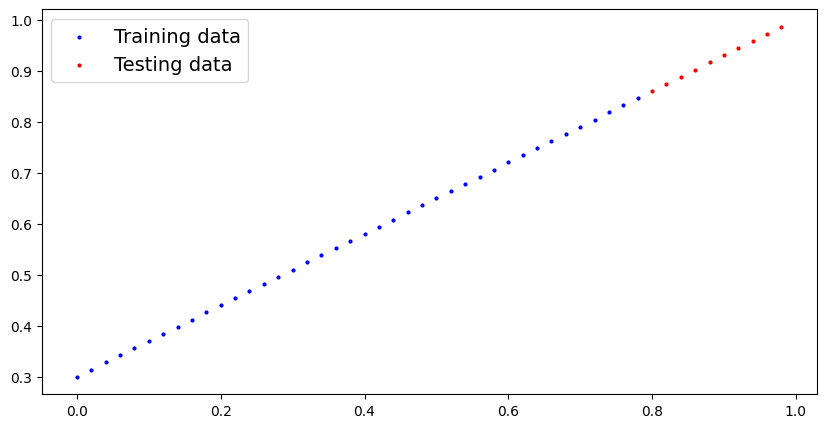

In [368]:
def plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test, predictions=None):
  # Plots training data, test data and compares predictions
  plt.figure(figsize=(10,5))

  # Plots Training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plots Testing data
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if(predictions is not None):
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size":14})
plot_predictions()

## 2. Build Model


In [369]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x) -> torch.Tensor: # Overrides default forward() from nn.Module
        return self.weight*x + self.bias

In [370]:
# torch.manual_seed(9)

model_0 = LinearRegressionModel()

print(list(model_0.parameters()), '\n')
print(model_0.state_dict())

[Parameter containing:
tensor([-0.2416], requires_grad=True), Parameter containing:
tensor([-0.5222], requires_grad=True)] 

OrderedDict([('weight', tensor([-0.2416])), ('bias', tensor([-0.5222]))])


In [371]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds
# plot_predictions(predictions=y_preds)

tensor([[-0.7155],
        [-0.7203],
        [-0.7252],
        [-0.7300],
        [-0.7348],
        [-0.7397],
        [-0.7445],
        [-0.7493],
        [-0.7542],
        [-0.7590]])

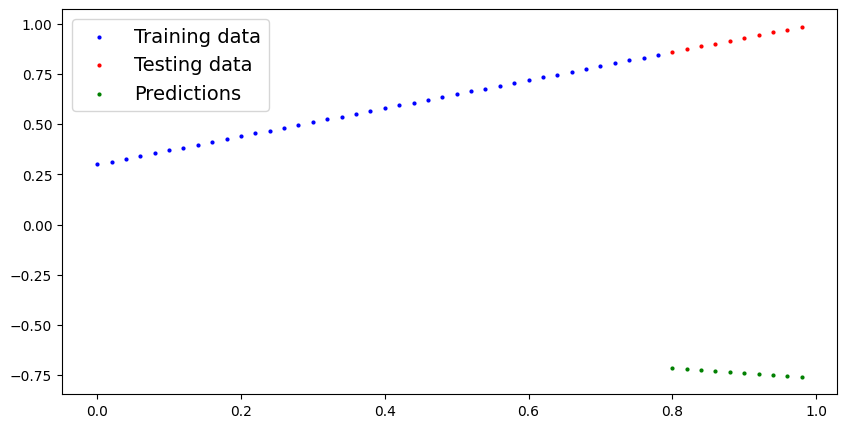

In [372]:
plot_predictions(predictions=y_preds)

Loss Function

In [373]:
MAE_loss = torch.mean(torch.abs(Y_test - y_preds))
loss_fn = nn.L1Loss();
print(MAE_loss)
print(torch.nn.L1Loss()(Y_test, y_preds))

tensor(1.6603)
tensor(1.6603)


In [374]:
# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [375]:
# Track different values
epoch_counter = 0
epoch_count = []
loss_values = []
test_loss_values = []

In [376]:
epochs = 100

### Training a model
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 1. Forward pass
    y_pred = model_0(X_train) # calls __call__() which includes forward() and many things

    # 2. Calculate the loss
    loss = loss_fn(y_pred, Y_train)
    # print(loss)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()

    if(epoch % 10 == 0):
        model_0.eval()
        with torch.inference_mode():
            test_pred = model_0(X_test)
            test_loss = loss_fn(test_pred, Y_test)
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

            epoch_count.append(epoch_counter)
            epoch_counter += 10
            loss_values.append(loss)
            test_loss_values.append(test_loss)

print(model_0.state_dict()) # turn of gradient tracking

Epoch: 0 | Loss: 1.1894352436065674 | Test loss: 1.6467832326889038
Epoch: 10 | Loss: 1.0742251873016357 | Test loss: 1.512073278427124
Epoch: 20 | Loss: 0.9590152502059937 | Test loss: 1.3773633241653442
Epoch: 30 | Loss: 0.8438053131103516 | Test loss: 1.242653250694275
Epoch: 40 | Loss: 0.7285953164100647 | Test loss: 1.1079432964324951
Epoch: 50 | Loss: 0.6133853197097778 | Test loss: 0.9732334017753601
Epoch: 60 | Loss: 0.49817532300949097 | Test loss: 0.8385233879089355
Epoch: 70 | Loss: 0.3829653263092041 | Test loss: 0.7038133144378662
Epoch: 80 | Loss: 0.26775532960891724 | Test loss: 0.5691033601760864
Epoch: 90 | Loss: 0.17520056664943695 | Test loss: 0.44932061433792114
OrderedDict([('weight', tensor([0.1445])), ('bias', tensor([0.4223]))])


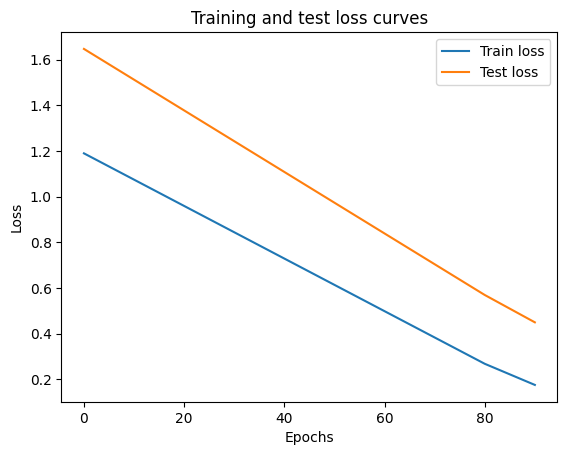

In [377]:
# Plotting loss's per epoch
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

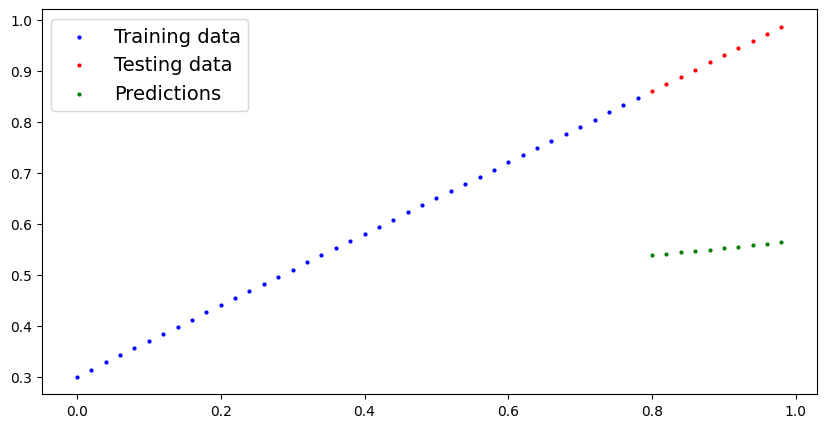

In [378]:
# Result
with torch.inference_mode():
    y_preds_new = model_0(X_test)
plot_predictions(predictions=y_preds_new)

In [379]:
# Saving our PyTorch model
from pathlib import Path

# 1. Creating models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True) #parents=true create missing folders, exist_ok=true. means dun do anything if it already exists

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)
#

Saving model to: models/01_pytorch_workflow_model.pth


# Loading a PyTorch model

Since we only saved `state_dict()` rather than entire model, we'll need to create a new instance of the model and load the `state_dict()` into it

In [380]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.1445])), ('bias', tensor([0.4223]))])

In [381]:
new_model_0 = LinearRegressionModel()
new_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
new_model_0.state_dict()

OrderedDict([('weight', tensor([0.1445])), ('bias', tensor([0.4223]))])

In [382]:
new_model_0.eval()
with torch.inference_mode():
    new_preds = new_model_0(X_test)
new_preds

tensor([[0.5379],
        [0.5408],
        [0.5437],
        [0.5465],
        [0.5494],
        [0.5523],
        [0.5552],
        [0.5581],
        [0.5610],
        [0.5639]])

In [383]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
new_preds
y_preds == new_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#Putting It All Together ========================


In [384]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [385]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [386]:
# Creating data
weight, bias = 1, 1
start, end, step = 0, 1, 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Need to unsqeeze otherwise error later
Y = weight*X + bias

40


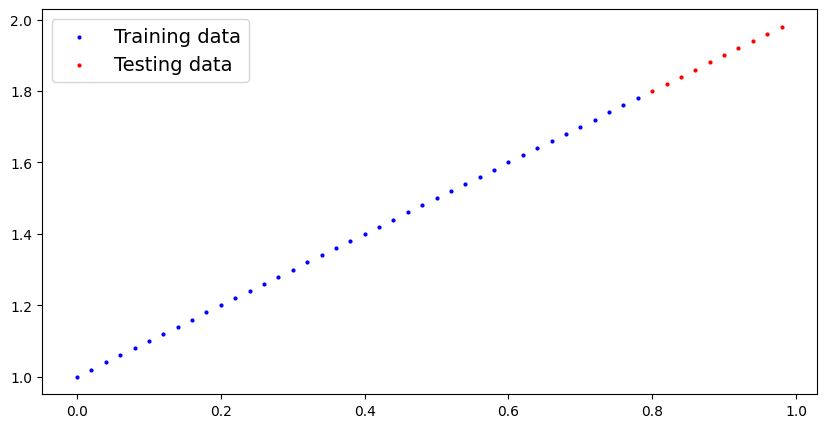

In [387]:
# Segregating our data
train_split = int(0.8*len(Y))
print(train_split)
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]
plot_predictions(train_data=X_train, train_labels=Y_train, test_data=X_test, test_labels=Y_test)


In [388]:
# Model using built in Linear Layer
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linearLayer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x):
        return self.linearLayer(x)

In [389]:
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('linearLayer.weight', tensor([[0.5522]])),
             ('linearLayer.bias', tensor([-0.1499]))])

In [390]:
# Moving all data into GPU
model_1 = model_1.to(device)
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)
device

'cuda'

In [391]:
# Declaring which loss fn and optimizer to use to get results for model
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

In [392]:
# Training Loop
epochs = 200

for epoch in range(epochs+1):
    model_1.train()
    y_preds = model_1(X_train)
    loss = loss_fn(y_preds, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(epoch % 10 == 0):
        model_1.eval()
        with torch.inference_mode():
            test_pred = model_1(X_test)
            test_loss = loss_fn(test_pred, Y_test)
            print(f"Epoch: {epoch} | Loss: {loss} | Test_Loss: {test_loss}")
print(model_1.state_dict())

Epoch: 0 | Loss: 1.3245970010757446 | Test_Loss: 1.5350327491760254
Epoch: 10 | Loss: 1.2093870639801025 | Test_Loss: 1.4003227949142456
Epoch: 20 | Loss: 1.0941771268844604 | Test_Loss: 1.2656129598617554
Epoch: 30 | Loss: 0.9789671301841736 | Test_Loss: 1.1309030055999756
Epoch: 40 | Loss: 0.8637571334838867 | Test_Loss: 0.9961929321289062
Epoch: 50 | Loss: 0.7485471963882446 | Test_Loss: 0.8614832162857056
Epoch: 60 | Loss: 0.6333374381065369 | Test_Loss: 0.7267733216285706
Epoch: 70 | Loss: 0.51812744140625 | Test_Loss: 0.5920635461807251
Epoch: 80 | Loss: 0.40291762351989746 | Test_Loss: 0.4573536813259125
Epoch: 90 | Loss: 0.28770777583122253 | Test_Loss: 0.32264384627342224
Epoch: 100 | Loss: 0.17249789834022522 | Test_Loss: 0.1879340410232544
Epoch: 110 | Loss: 0.05728801712393761 | Test_Loss: 0.05322420597076416
Epoch: 120 | Loss: 0.011203977279365063 | Test_Loss: 0.0006598353502340615
Epoch: 130 | Loss: 0.011203977279365063 | Test_Loss: 0.0006598353502340615
Epoch: 140 | Loss

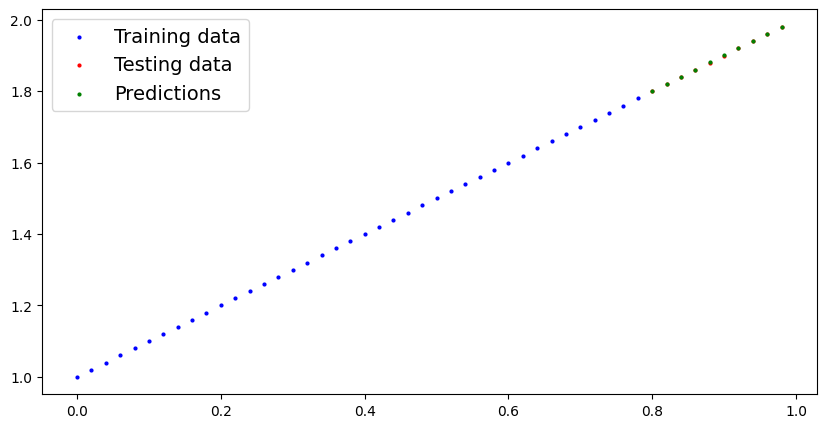

In [393]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
plot_predictions(
    train_data=X_train.cpu(),
    train_labels=Y_train.cpu(),
    test_data=X_test.cpu(),
    test_labels=Y_test.cpu(),
    predictions=y_preds.cpu()
)

In [394]:
# Saving state_dict()
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving mode to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Saving mode to: models/02_pytorch_workflow_model_2.pth


In [395]:
# Loading state_dict() onto new model
new_model_1 = LinearRegressionModel()
new_model_1 = new_model_1.to(device)
new_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
new_model_1.state_dict()

OrderedDict([('linearLayer.weight', tensor([[1.0007]], device='cuda:0')),
             ('linearLayer.bias', tensor([1.0000], device='cuda:0'))])

In [396]:
# Evaluate. See that with same state_dict() it produces same results
new_model_1.eval()
with torch.inference_mode():
    new_preds = new_model_1(X_test)
y_preds == new_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')